# Transform scaling

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

%matplotlib inline

from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, arg, atan2, re, cos, exp_polar, pi
from sympy.abc import A,B,t,f 

Running Python: 3.8.19
Running Sympy: 1.12.1


In [2]:
tlim = 3
tt = np.linspace(-tlim, tlim, 1000)
flim = 3
ff = np.linspace(-flim, flim, 1000)

## Create some scaled rect functions

In [3]:
ts = Symbol('t')
def my_rect(p):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

p = Symbol('p')
sincu = lambda t,p: sinc(p*pi*t) # swithc to sinc ftn that evetyone else uses...

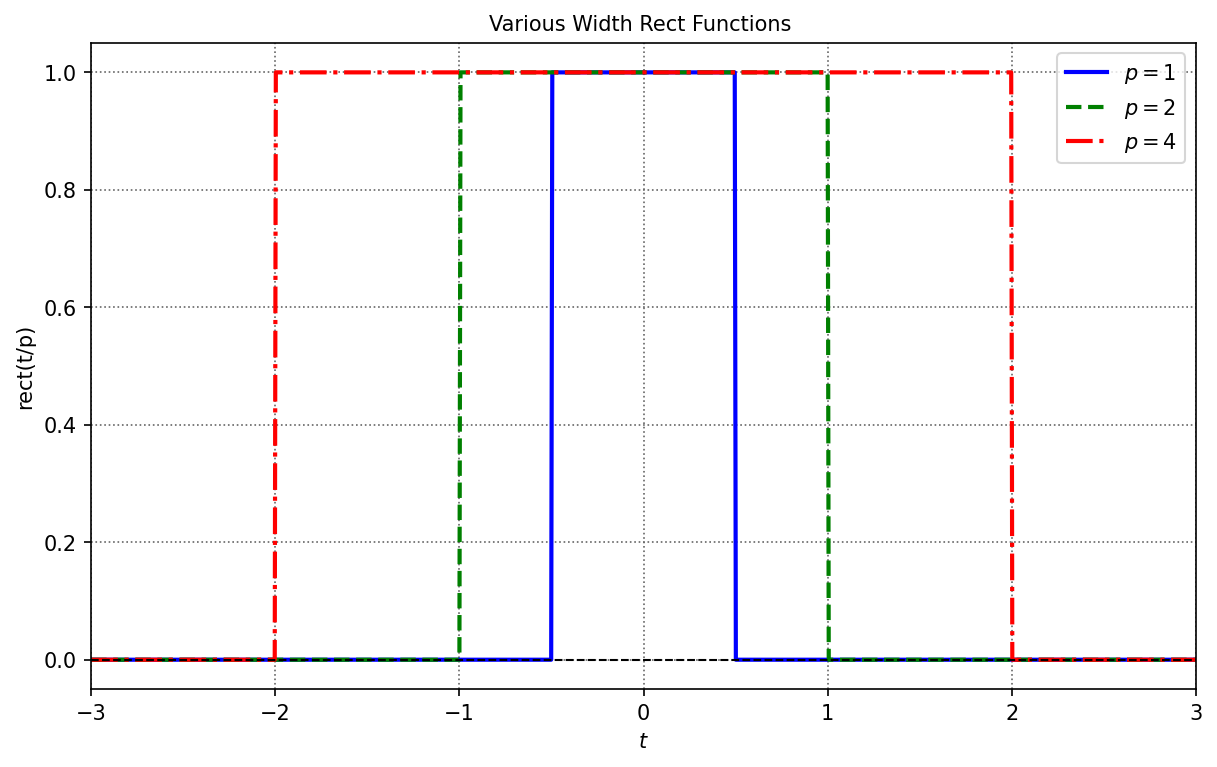

In [4]:
f1 = my_rect(1)
f2 = my_rect(2)
f4 = my_rect(4)

lam_f1 = lambdify(ts, f1, modules=['numpy'])
lam_f2 = lambdify(ts, f2, modules=['numpy'])
lam_f4 = lambdify(ts, f4, modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_f1(tt),'b',label='$p=1$',lw=2)
plt.plot(tt, lam_f2(tt),'g--',label='$p=2$')
plt.plot(tt, lam_f4(tt),'r-.',label='$p=4$')

nicegrid()
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('rect(t/p)')
plt.title('Various Width Rect Functions ')
plt.show()

## Now Transform the scaled rects

In [5]:
Q1 = fourier_transform(f1, t, f)
Q2 = fourier_transform(f2, t, f, noconds=False)
sQ2 = sympify(Q2)
Q4 = fourier_transform(f4, t, f, noconds=False)
sQ4 = sympify(Q4)

## Plotting the transformed scaled rects

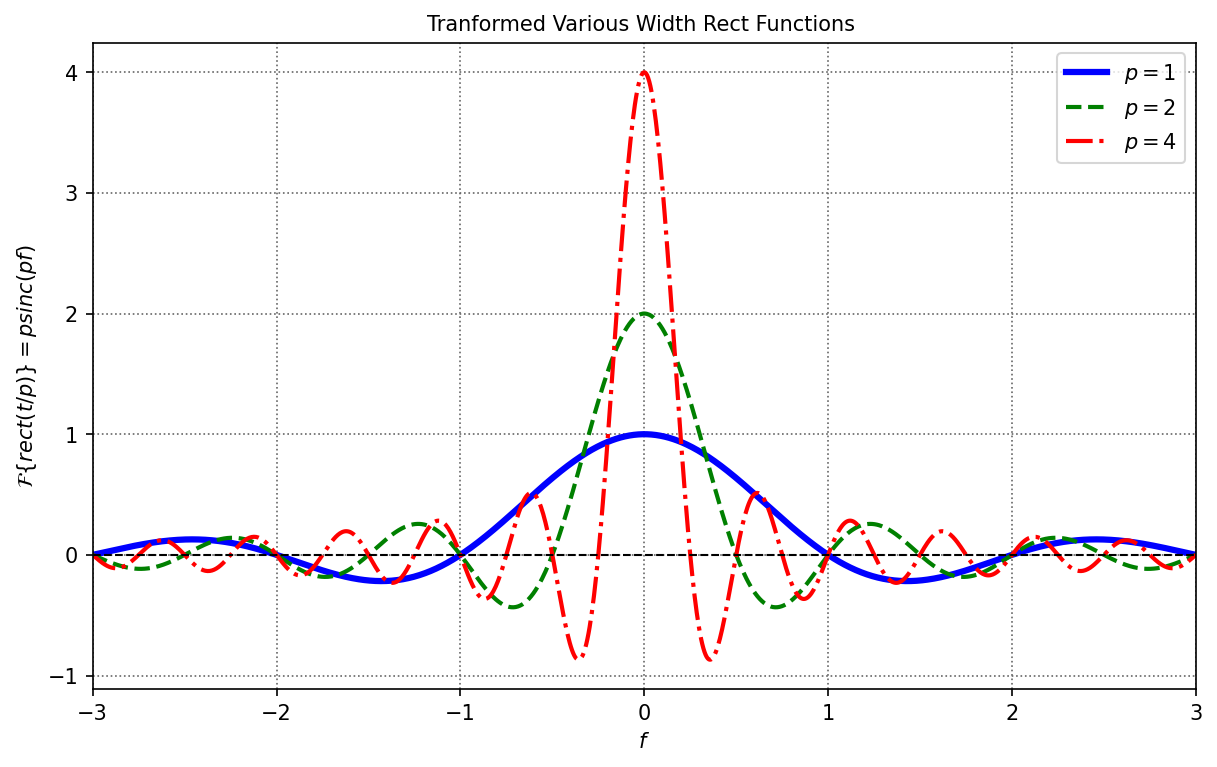

In [6]:
lam_Q1 = lambdify(f, Q1, modules=['numpy'])
lam_Q2 = lambdify(f, sQ2[0], modules=['numpy'])
lam_Q4 = lambdify(f, sQ4[0], modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ff, lam_Q1(ff),'b',label='$p=1$',lw=3)
plt.plot(ff, lam_Q2(ff),'g--',label='$p=2$')
plt.plot(ff, lam_Q4(ff),'r-.',label='$p=4$')

plt.legend()
plt.xlim(-flim,flim)
plt.xlabel('$f$')
plt.ylabel('${\cal F}\{rect(t/p)\} = p sinc (pf)$')
plt.title('Tranformed Various Width Rect Functions ')
nicegrid()
plt.show()

### Recall - Expected transform: ${\tt rect}(t/p) \Leftrightarrow p {\tt sinc}(pf)$

## Now try transforming ${\tt sinc}(pt)$

In [7]:
nf1 = sincu(t,1)
nf2 = sincu(t,2)
nf4 = sincu(t,4)

lam_nf1 = lambdify(t, nf1, modules=['numpy'])
lam_nf2 = lambdify(t, nf2, modules=['numpy'])
lam_nf4 = lambdify(t, nf4, modules=['numpy'])

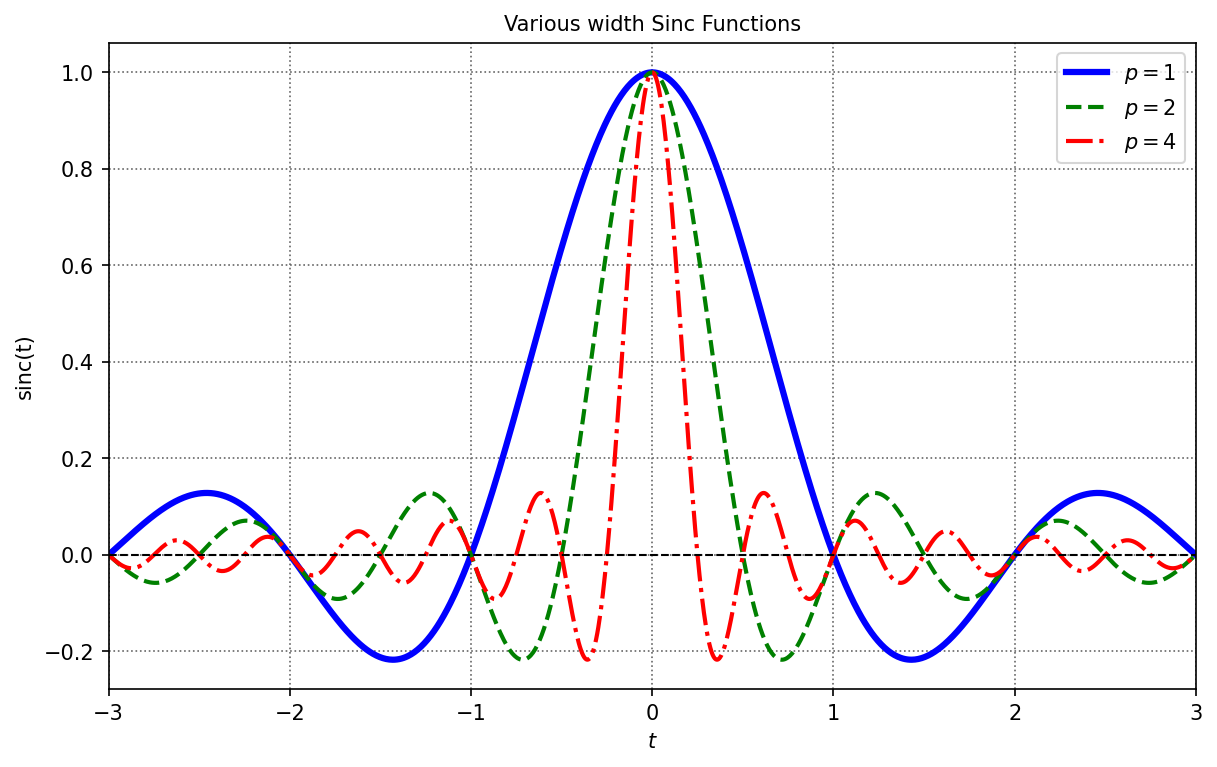

In [8]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_nf1(tt),'b',label='$p=1$',lw=3)
plt.plot(tt, lam_nf2(tt),'g--',label='$p=2$')
plt.plot(tt, lam_nf4(tt),'r-.',label='$p=4$')

plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('sinc(t)')
plt.title('Various width Sinc Functions')
nicegrid()
plt.show()

### Transform and plot

In [9]:
nQ1 = fourier_transform(nf1, t, f)
nQ2 = fourier_transform(nf2, t, f)
nQ4 = fourier_transform(nf4, t, f)

lam_nQ1 = lambdify(f, nQ1, modules=['numpy'])
lam_nQ2 = lambdify(f, nQ2, modules=['numpy'])
lam_nQ4 = lambdify(f, nQ4, modules=['numpy'])

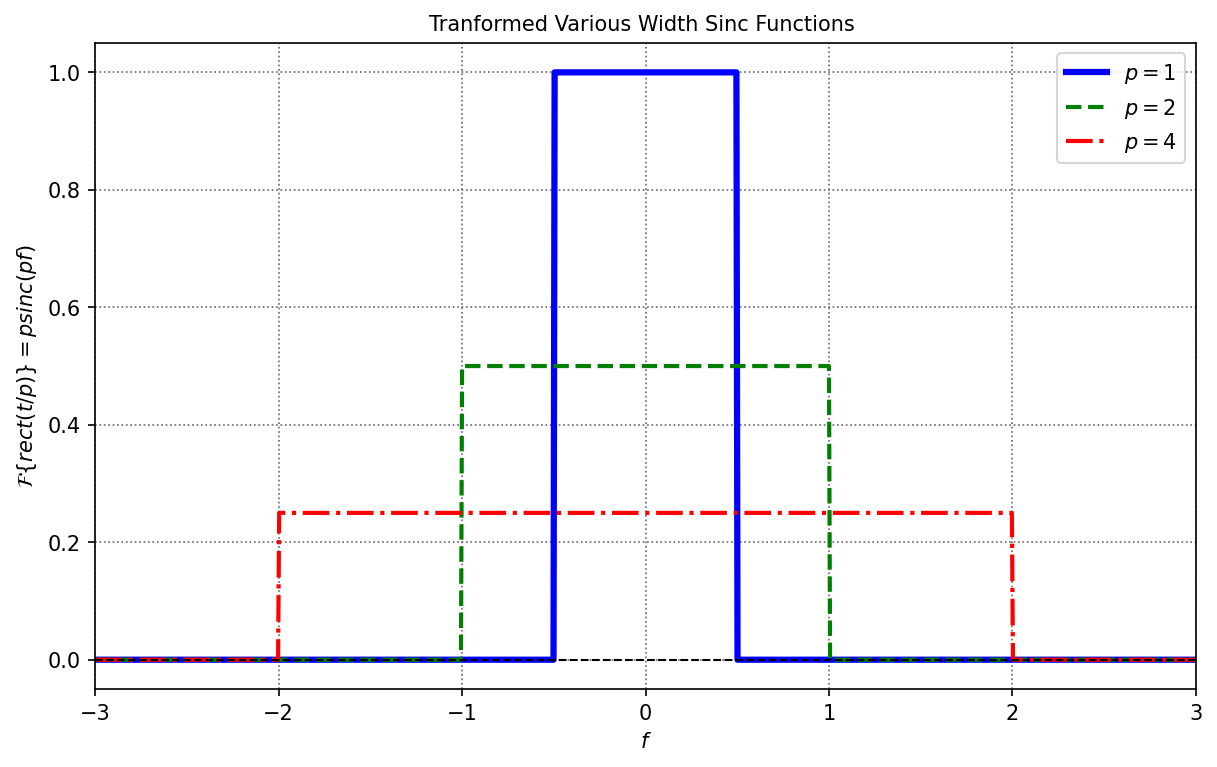

In [10]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ff, lam_nQ1(ff),'b',label='$p=1$',lw=3)
plt.plot(ff, lam_nQ2(ff),'g--',label='$p=2$')
plt.plot(ff, lam_nQ4(ff),'r-.',label='$p=4$')

plt.legend()
plt.xlim(-flim,flim)
plt.xlabel('$f$')
plt.ylabel('${\cal F}\{rect(t/p)\} = p sinc (pf)$')
plt.title('Tranformed Various Width Sinc Functions ')
nicegrid()
plt.show()

### Recall - Expected transform: ${\tt sinc}(pt) \Leftrightarrow (1/p) {\tt rect}(f/p)$